In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JuliaGuerreiro/ICD-Project/main/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
#Utilizando boostrap vamos verificar a chance de um país considerado mais desenvolvido ter maior taxa de suicidios que os paises menos desenvolvidos

In [ ]:
#Hipótese nula: países com maior desenvolvimento possuem menor taxa de suicídios
#Hipótese alternativa: países com maior desenvolvimento possuem maiores taxas de suicídios

In [ ]:
def bootstrap_mean(data,n_sub,col):
    size = len(data)
    values = np.zeros(n_sub)
    for i in range(n_sub):
        sample = data.sample(size,replace=True,random_state=i)
        values[i] = sample[col].mean()
    
    return values

In [ ]:
dados_1 = df[df['HDI for year'] > 0.8]
dados_3 = df[df['HDI for year'] <= 0.8]

In [ ]:
dados_1 = dados_1.dropna()
dados_3 = dados_3.dropna()
dados_1 = dados_1.groupby(['country','year']).sum()
dados_3 = dados_3.groupby(['country','year']).sum()

In [ ]:
col = 'suicides/100k pop'
suicidios_idh_ricos = bootstrap_mean(dados_1,10000,col)
suicidios_idh_pobres = bootstrap_mean(dados_3,10000,col)

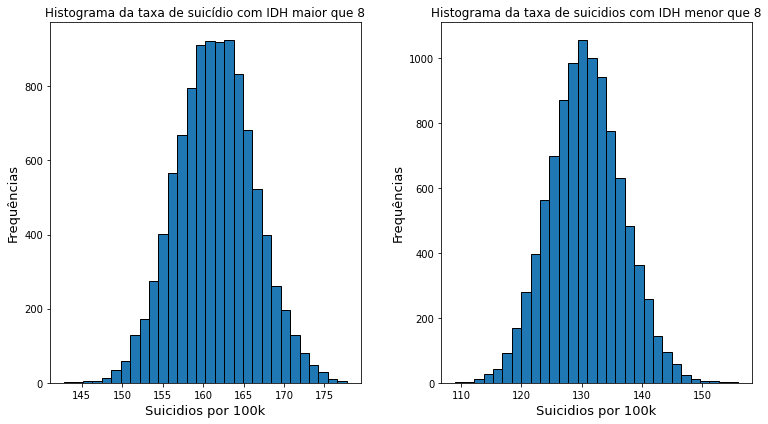

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
ax1.hist(suicidios_idh_ricos, bins=30, edgecolor='k')
ax1.set_xlabel('Suicidios por 100k', fontsize=13)
ax1.set_ylabel('Frequências', fontsize=13)
ax1.set_title('Histograma da taxa de suicídio com IDH maior que 8', fontsize=12)

ax2.hist(suicidios_idh_pobres,bins=30,edgecolor='k')
ax2.set_xlabel('Suicidios por 100k', fontsize=13)
ax2.set_ylabel('Frequências', fontsize=13)
ax2.set_title('Histograma da taxa de suicidios com IDH menor que 8', fontsize=12)
fig.tight_layout()

In [ ]:
boxplot_idh = pd.DataFrame()
boxplot_idh['pobres'] = suicidios_idh_pobres
boxplot_idh['ricos'] = suicidios_idh_ricos

Text(0, 0.5, 'Taxa de Suicídios Media')

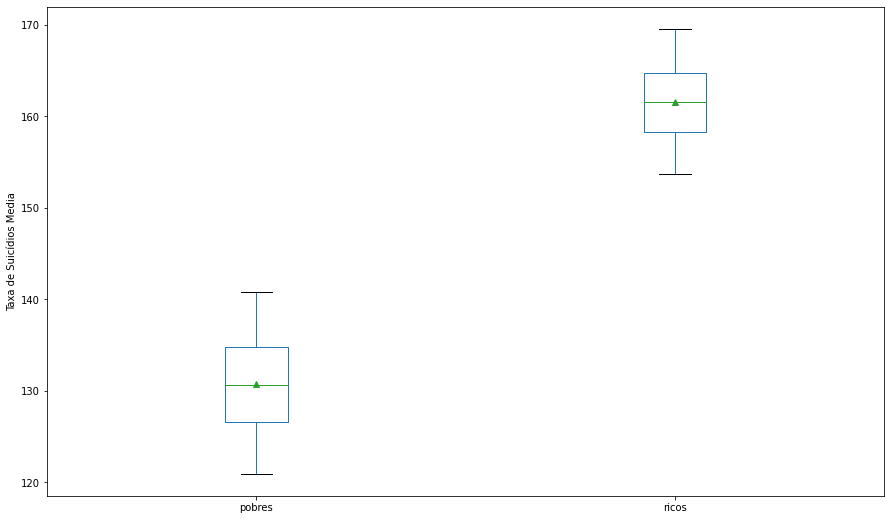

In [ ]:
boxplot_idh.boxplot(grid=False, sym='', whis=[5, 95], showmeans=True)
plt.ylabel('Taxa de Suicídios Media')

In [ ]:
col = 'suicides_no'
no_suicidios_idh_ricos = bootstrap_mean(dados_1,10000,col)
no_suicidios_idh_pobres = bootstrap_mean(dados_3,10000,col)

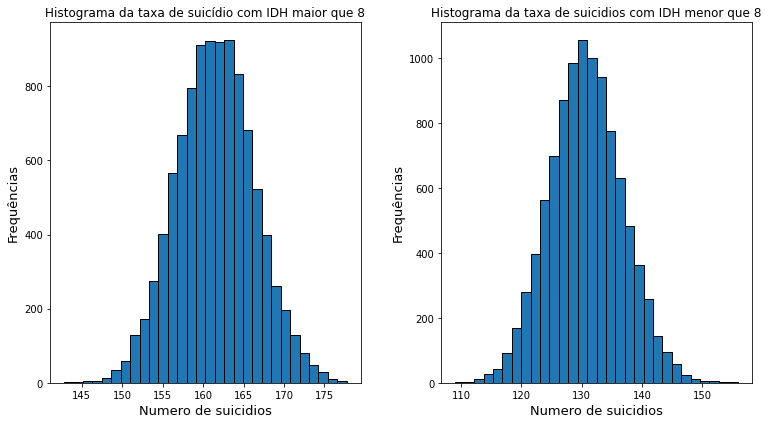

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
ax1.hist(suicidios_idh_ricos, bins=30, edgecolor='k')
ax1.set_xlabel('Numero de suicidios', fontsize=13)
ax1.set_ylabel('Frequências', fontsize=13)
ax1.set_title('Histograma da taxa de suicídio com IDH maior que 8', fontsize=12)

ax2.hist(suicidios_idh_pobres,bins=30,edgecolor='k')
ax2.set_xlabel('Numero de suicidios', fontsize=13)
ax2.set_ylabel('Frequências', fontsize=13)
ax2.set_title('Histograma da taxa de suicidios com IDH menor que 8', fontsize=12)
fig.tight_layout()

In [ ]:
boxplot_suicidios = pd.DataFrame()
boxplot_suicidios['pobres'] = no_suicidios_idh_pobres
boxplot_suicidios['ricos'] = no_suicidios_idh_ricos

Text(0, 0.5, 'Número Medio de Suicídios')

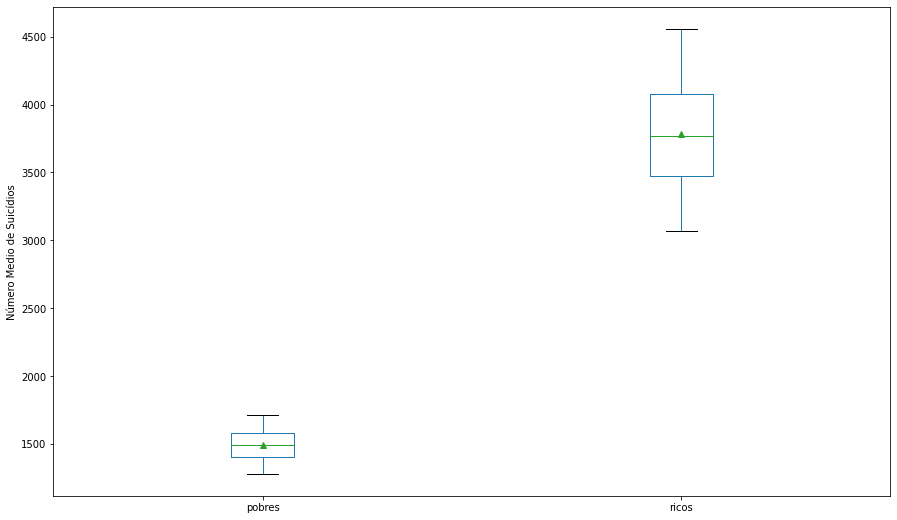

In [ ]:
boxplot_suicidios.boxplot(grid=False, sym='', whis=[5, 95], showmeans=True)
plt.ylabel('Número Medio de Suicídios')

In [ ]:
col = 'gdp_per_capita ($)'
gdp_percapita_ricos = bootstrap_mean(dados_1,10000,col)
gdp_percapita_pobres = bootstrap_mean(dados_3,10000,col)

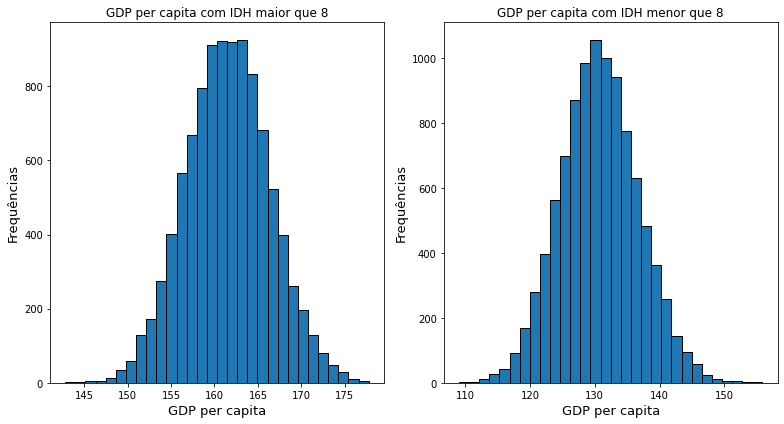

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6))
ax1.hist(suicidios_idh_ricos, bins=30, edgecolor='k')
ax1.set_xlabel('GDP per capita', fontsize=13)
ax1.set_ylabel('Frequências', fontsize=13)
ax1.set_title('GDP per capita com IDH maior que 8', fontsize=12)

ax2.hist(suicidios_idh_pobres,bins=30,edgecolor='k')
ax2.set_xlabel('GDP per capita', fontsize=13)
ax2.set_ylabel('Frequências', fontsize=13)
ax2.set_title('GDP per capita com IDH menor que 8', fontsize=12)
fig.tight_layout()

In [ ]:
dados_1 = df[df['HDI for year'] > 0.8]
dados_3 = df[df['HDI for year'] <= 0.8]

In [ ]:
boxplot_gdp_percapita = pd.DataFrame()
boxplot_gdp_percapita['pobres'] = gdp_percapita_pobres
boxplot_gdp_percapita['ricos'] = gdp_percapita_ricos

Text(0, 0.5, 'GDP Per Capita Medio')

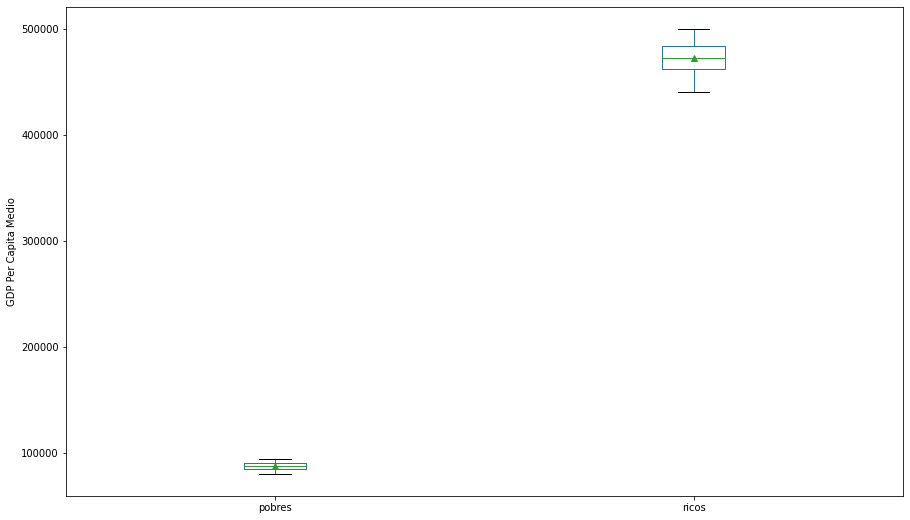

In [ ]:
boxplot_gdp_percapita.boxplot(grid=False, sym='', whis=[2, 95], showmeans=True)
plt.ylabel('GDP Per Capita Medio')

In [ ]:
comparacao = df

In [ ]:
comparacao2 = comparacao[comparacao['year'] == 2011]
comparacao2 = comparacao2.groupby(['year','country']).sum()
comparacao2 = comparacao2.reset_index()
comparacao2.dropna()
comparacao2.drop_duplicates()
comparacao2.sort_values(by='gdp_per_capita ($)',ascending=False)
mais_ricos2011 = comparacao2.nlargest(40, 'gdp_per_capita ($)',keep='first')

In [ ]:
comparacao1 = comparacao[comparacao['year'] == 2010]
comparacao1 = comparacao1.groupby(['year','country']).sum()
comparacao1 = comparacao1.reset_index()
comparacao1.dropna()
comparacao1.drop_duplicates()
comparacao1.sort_values(by='gdp_per_capita ($)',ascending=False)
mais_ricos2010 = comparacao1.nlargest(40, 'gdp_per_capita ($)',keep='first')

media = mais_ricos2010['suicides/100k pop'].mean()

In [ ]:
comparacao3 = comparacao[comparacao['year'] == 2012]
comparacao3 = comparacao3.groupby(['year','country']).sum()
comparacao3 = comparacao3.reset_index()
comparacao3.dropna()
comparacao3.drop_duplicates()
comparacao3.sort_values(by='gdp_per_capita ($)',ascending=False)
mais_ricos2012 = comparacao3.nlargest(40, 'gdp_per_capita ($)',keep='first')

In [ ]:
comparacao4= comparacao[comparacao['year'] == 2013]
comparacao4 = comparacao4.groupby(['year','country']).sum()
comparacao4 = comparacao4.reset_index()
comparacao4.dropna()
comparacao4.drop_duplicates()
comparacao4.sort_values(by='gdp_per_capita ($)',ascending=False)
mais_ricos2013 = comparacao4.nlargest(40, 'gdp_per_capita ($)',keep='first')

In [ ]:
comparacao5= comparacao[comparacao['year'] == 2014]
comparacao5 = comparacao5.groupby(['year','country']).sum()
comparacao5 = comparacao5.reset_index()
comparacao5.dropna()
comparacao5.drop_duplicates()
comparacao5.sort_values(by='gdp_per_capita ($)',ascending=False)
mais_ricos2014 = comparacao5.nlargest(40, 'gdp_per_capita ($)',keep='first')

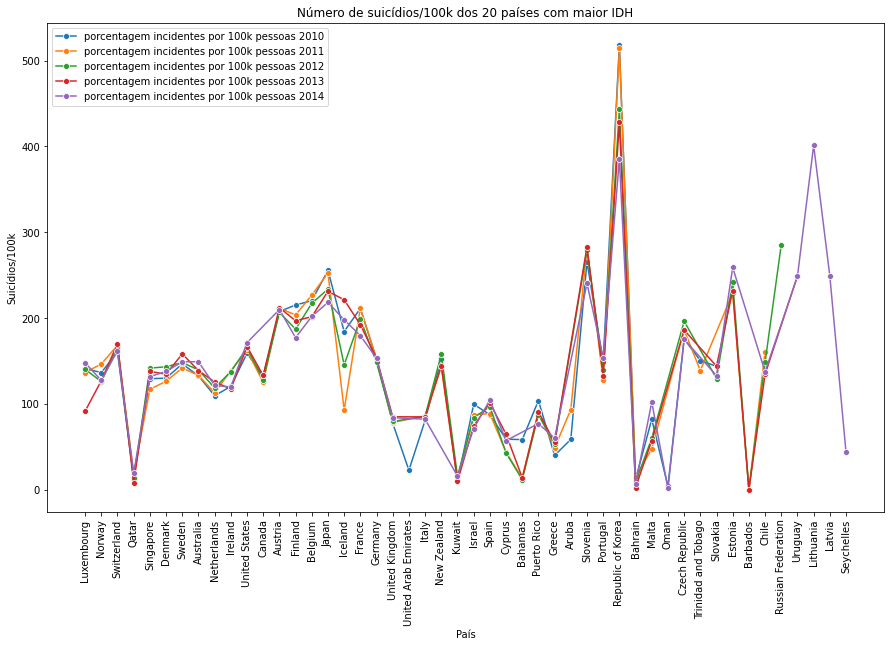

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2010, label='porcentagem incidentes por 100k pessoas 2010')
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2011, label='porcentagem incidentes por 100k pessoas 2011')
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2012, label='porcentagem incidentes por 100k pessoas 2012')
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2013, label='porcentagem incidentes por 100k pessoas 2013')
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2014, label='porcentagem incidentes por 100k pessoas 2014')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com maior IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

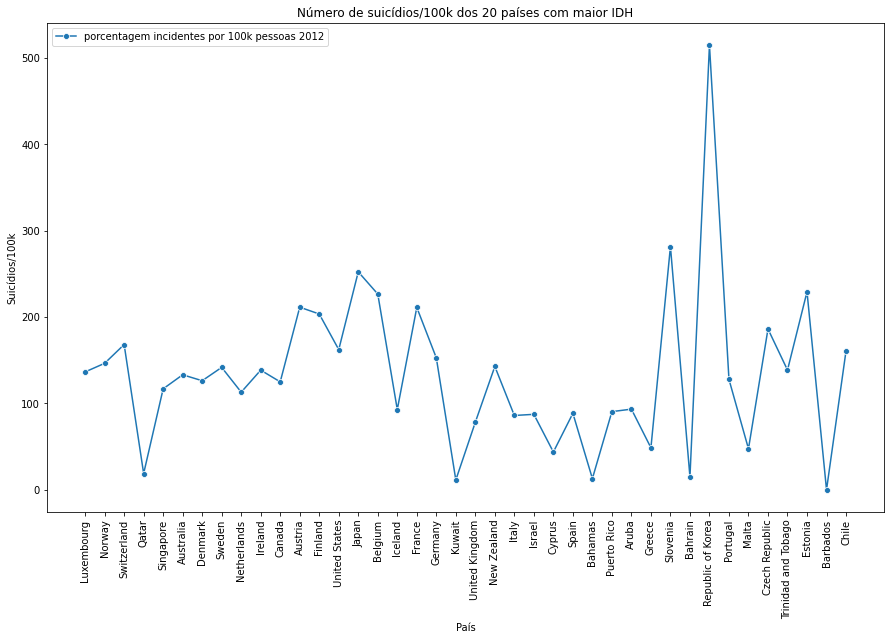

In [ ]:

sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2011, label='porcentagem incidentes por 100k pessoas 2012')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com maior IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

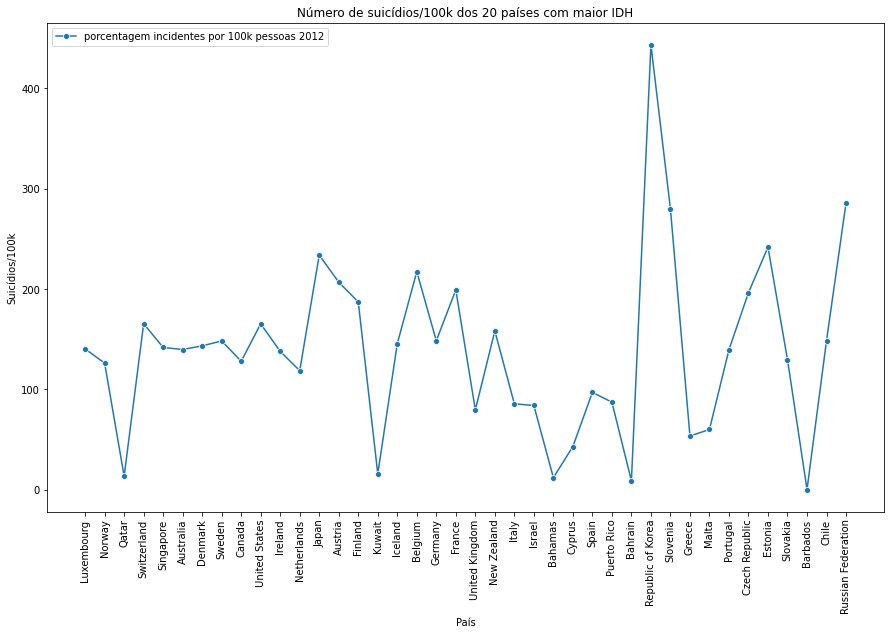

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2012, label='porcentagem incidentes por 100k pessoas 2012')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com maior IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

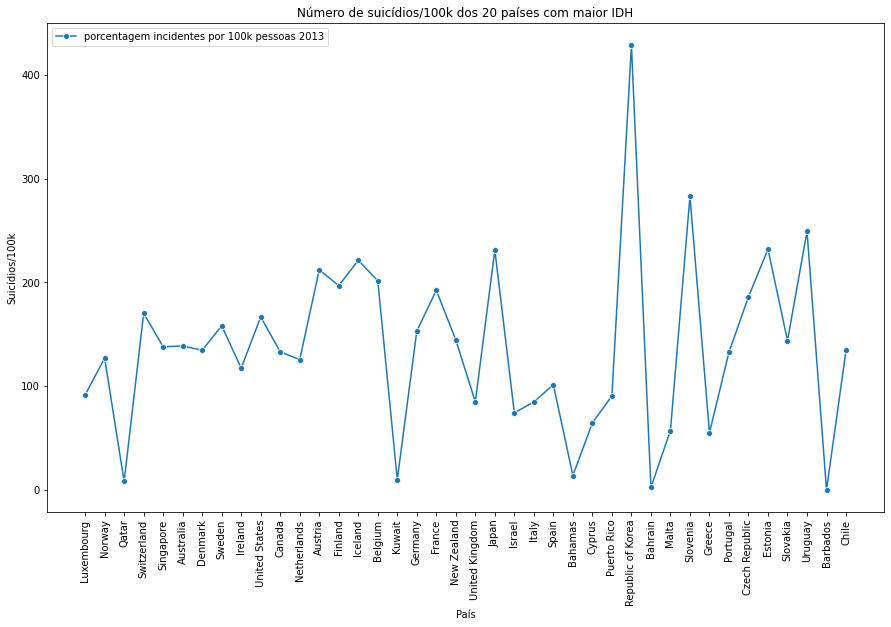

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2013, label='porcentagem incidentes por 100k pessoas 2013')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com maior IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

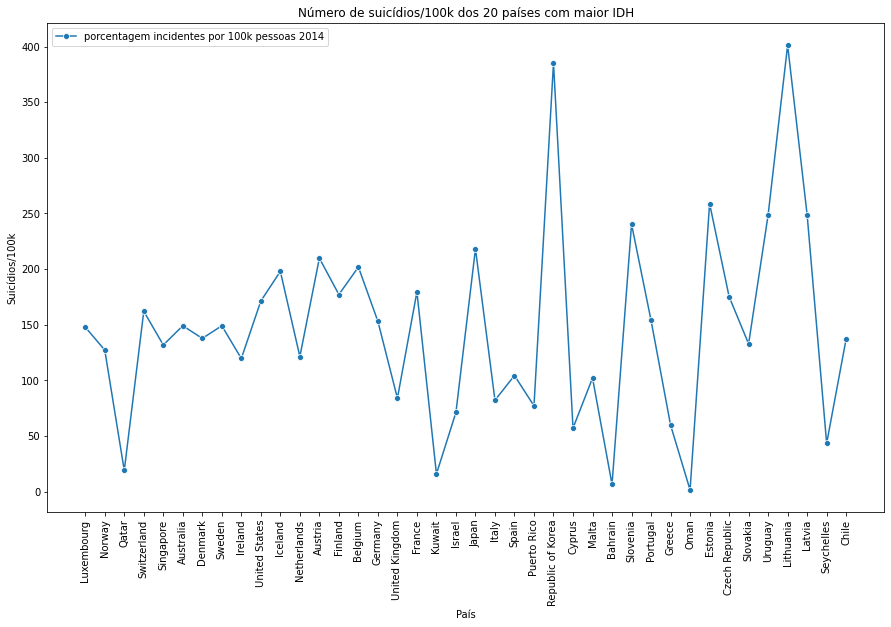

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_ricos2014, label='porcentagem incidentes por 100k pessoas 2014')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com maior IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
comparacao6 = comparacao[comparacao['year'] == 2010]
comparacao6 = comparacao6.groupby(['year','country']).sum()
comparacao6 = comparacao6.reset_index()
comparacao6.dropna()
comparacao6.drop_duplicates()
mais_pobres2010 = comparacao6.sort_values(by='gdp_per_capita ($)',ascending=True).nsmallest(40, 'gdp_per_capita ($)')

In [ ]:
comparacao7 = comparacao[comparacao['year'] == 2011]
comparacao7 = comparacao7.groupby(['year','country']).sum()
comparacao7 = comparacao7.reset_index()
comparacao7.dropna()
comparacao7.drop_duplicates()
mais_pobres2011 = comparacao7.sort_values(by='gdp_per_capita ($)',ascending=True).nsmallest(40, 'gdp_per_capita ($)')

In [ ]:
comparacao8 = comparacao[comparacao['year'] == 2012]
comparacao8 = comparacao8.groupby(['year','country']).sum()
comparacao8 = comparacao8.reset_index()
comparacao8.dropna()
comparacao8.drop_duplicates()
mais_pobres2012 = comparacao8.sort_values(by='gdp_per_capita ($)',ascending=True).nsmallest(40, 'gdp_per_capita ($)')

In [ ]:
comparacao9 = comparacao[comparacao['year'] == 2013]
comparacao9 = comparacao9.groupby(['year','country']).sum()
comparacao9 = comparacao9.reset_index()
comparacao9.dropna()
comparacao9.drop_duplicates()
mais_pobres2013 = comparacao9.sort_values(by='gdp_per_capita ($)',ascending=True).nsmallest(40, 'gdp_per_capita ($)')

In [ ]:
comparacao10 = comparacao[comparacao['year'] == 2014]
comparacao10 = comparacao10.groupby(['year','country']).sum()
comparacao10 = comparacao10.reset_index()
comparacao10.dropna()
comparacao10.drop_duplicates()
mais_pobres2014 = comparacao6.sort_values(by='gdp_per_capita ($)',ascending=True).nsmallest(40, 'gdp_per_capita ($)')

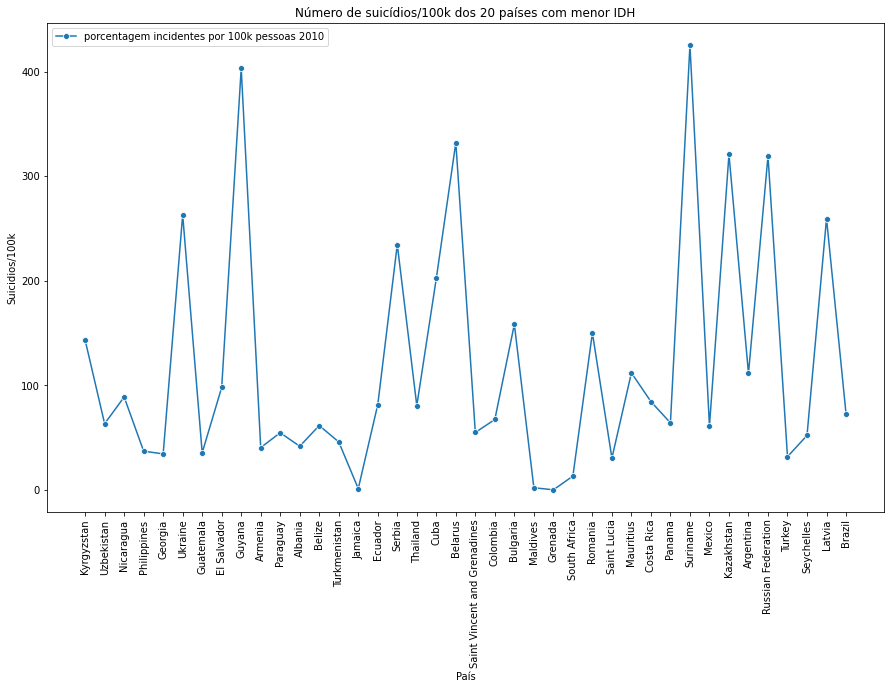

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_pobres2010, label='porcentagem incidentes por 100k pessoas 2010')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com menor IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicidios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

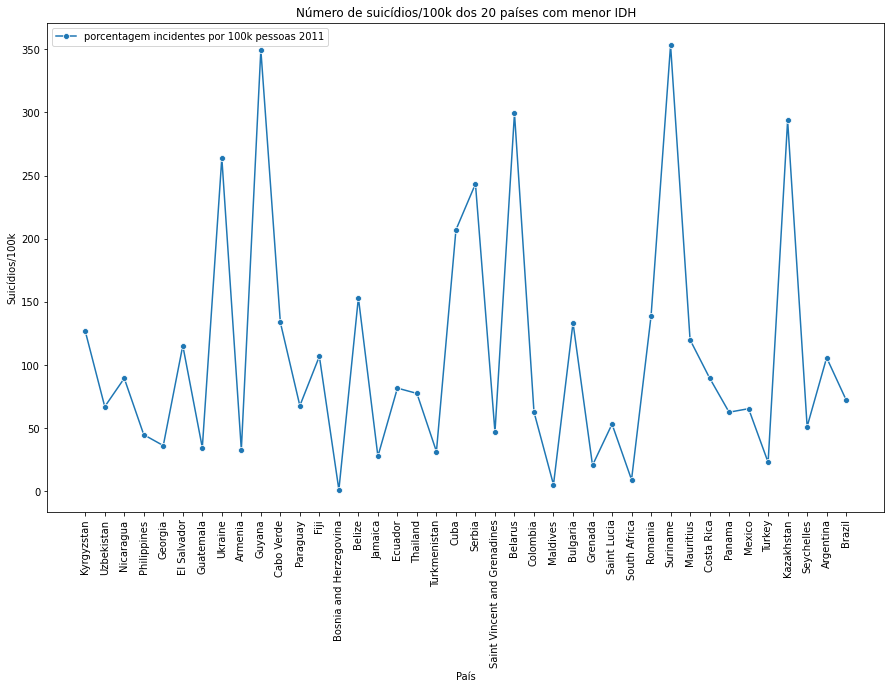

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_pobres2011, label='porcentagem incidentes por 100k pessoas 2011')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com menor IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

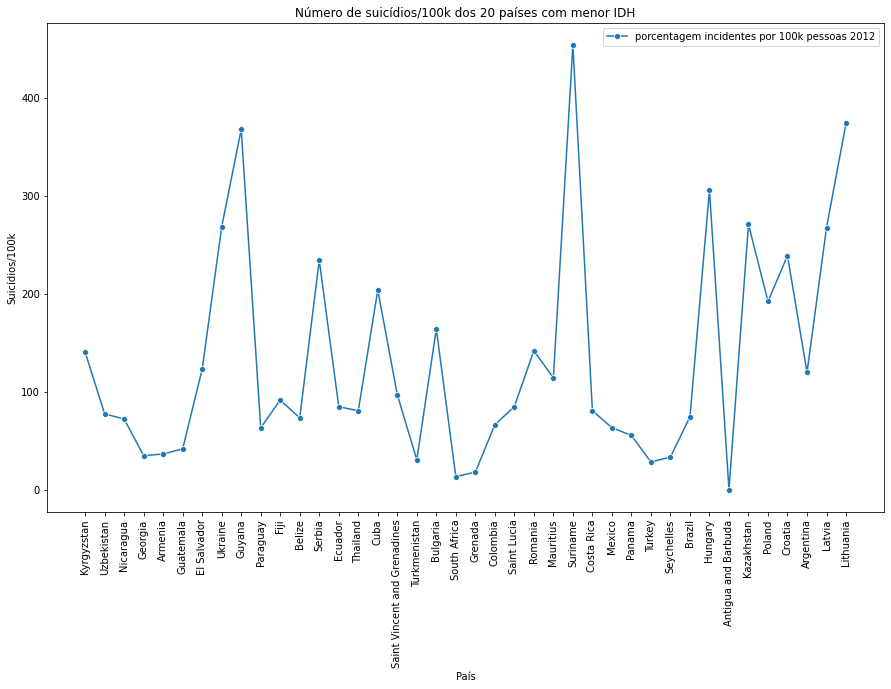

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_pobres2012, label='porcentagem incidentes por 100k pessoas 2012')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com menor IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

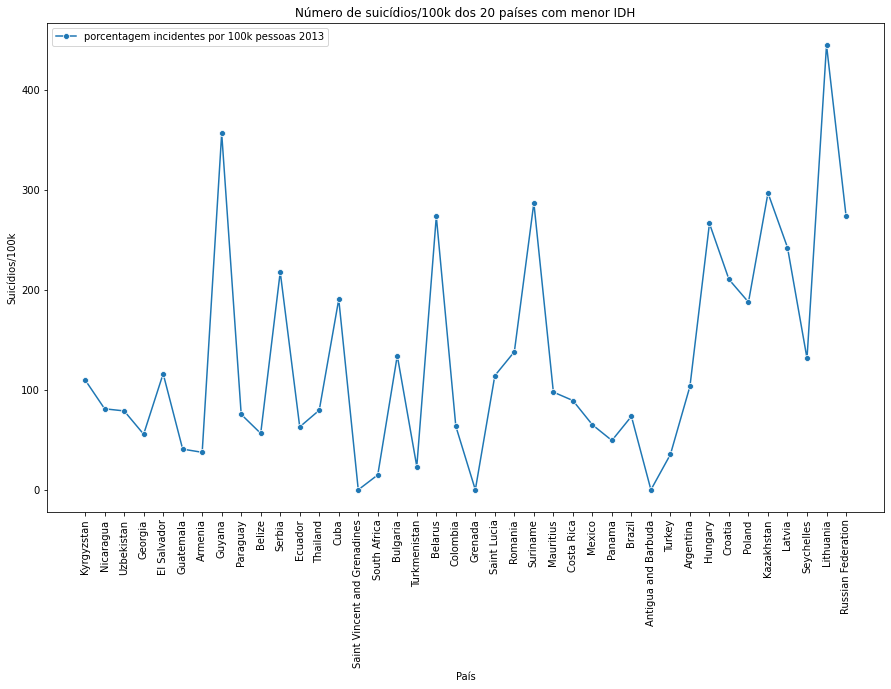

In [ ]:
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_pobres2013, label='porcentagem incidentes por 100k pessoas 2013')

# Título do plot
plt.title("Número de suicídios/100k dos 20 países com menor IDH")
# Nome do eixo x
plt.xlabel('País')
# Nome do eixo y
plt.ylabel('Suicídios/100k')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

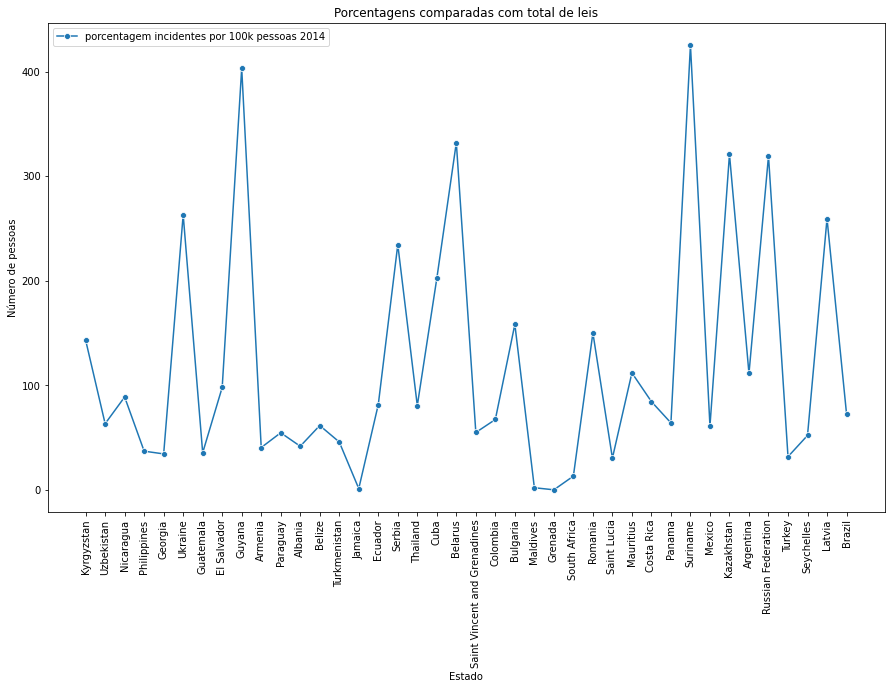

In [ ]:
#Plot cordering by total_leis
sns.lineplot(x='country', y='suicides/100k pop', marker='o',
                         data=mais_pobres2014, label='porcentagem incidentes por 100k pessoas 2014')

# Título do plot
plt.title("Porcentagens comparadas com total de leis")
# Nome do eixo x
plt.xlabel('Estado')
# Nome do eixo y
plt.ylabel('Número de pessoas')
# Rotaciona nomes no eixo x
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
x = comparacao1

Text(0.5, 1.0, 'Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2010')

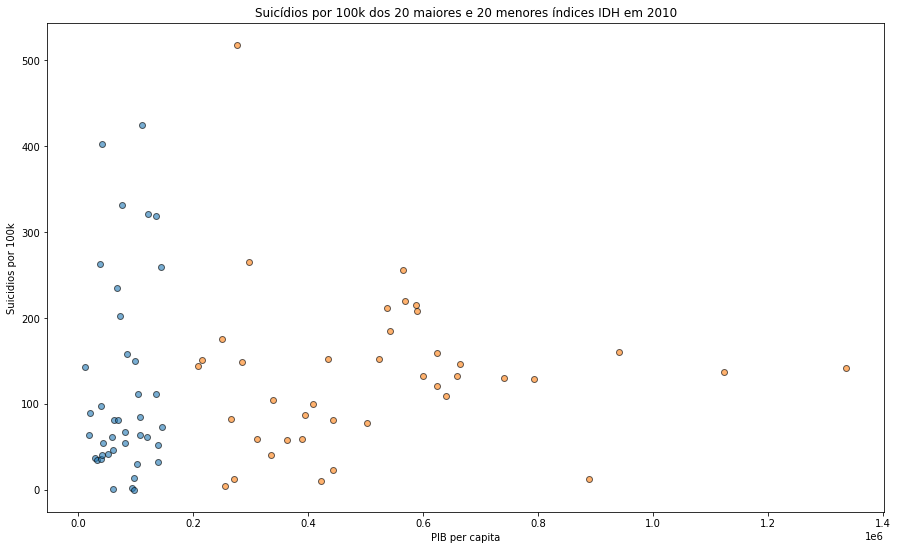

In [ ]:
x = mais_pobres2010['gdp_per_capita ($)']
y = mais_pobres2010['suicides/100k pop']
x1 = mais_ricos2010['gdp_per_capita ($)']
y1 = mais_ricos2010['suicides/100k pop']
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.scatter(x1, y1, edgecolor='k', alpha=0.6)
plt.xlabel('PIB per capita')
plt.ylabel('Suicidios por 100k')
plt.title('Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2010')

Text(0.5, 1.0, 'Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2011')

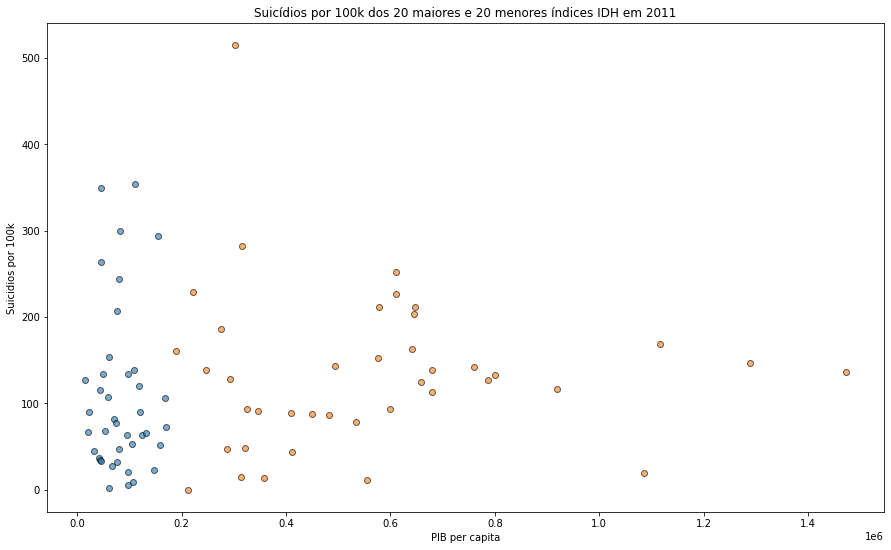

In [ ]:
x2 = mais_pobres2011['gdp_per_capita ($)']
y2 = mais_pobres2011['suicides/100k pop']
x3 = mais_ricos2011['gdp_per_capita ($)']
y3 = mais_ricos2011['suicides/100k pop']
plt.scatter(x2, y2, edgecolor='k', alpha=0.6)
plt.scatter(x3, y3, edgecolor='k', alpha=0.6)
plt.xlabel('PIB per capita')
plt.ylabel('Suicidios por 100k')
plt.title('Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2011')

Text(0.5, 1.0, 'Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2012')

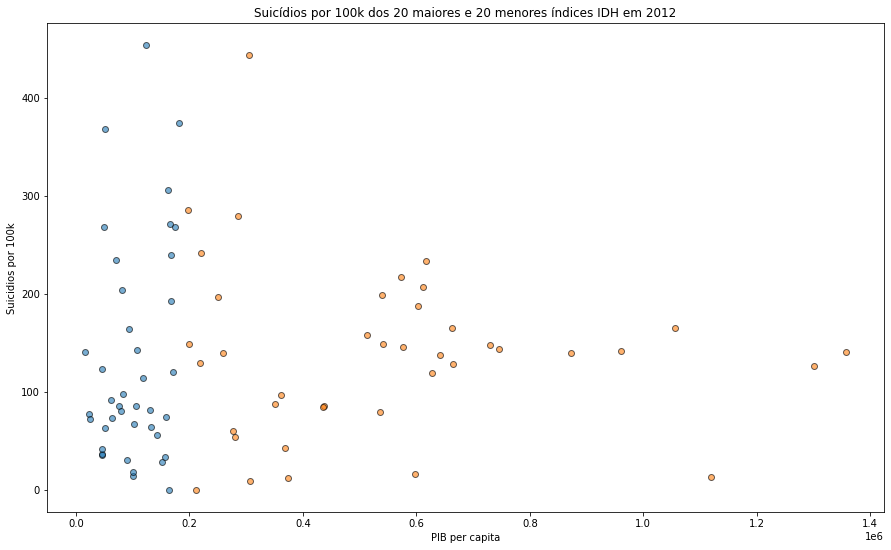

In [ ]:
x4 = mais_pobres2012['gdp_per_capita ($)']
y4 = mais_pobres2012['suicides/100k pop']
x5 = mais_ricos2012['gdp_per_capita ($)']
y5 = mais_ricos2012['suicides/100k pop']
plt.scatter(x4, y4, edgecolor='k', alpha=0.6)
plt.scatter(x5, y5, edgecolor='k', alpha=0.6)
plt.xlabel('PIB per capita')
plt.ylabel('Suicidios por 100k')
plt.title('Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2012')

Text(0.5, 1.0, 'Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2013')

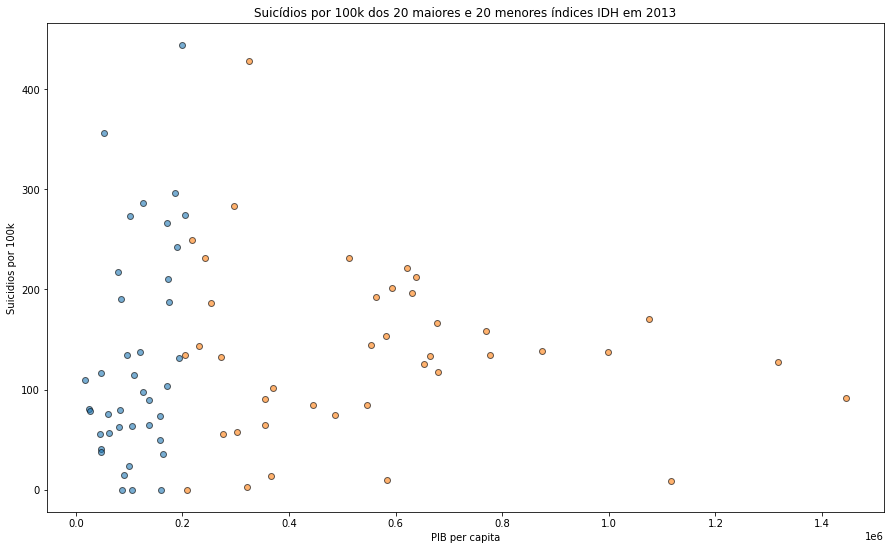

In [ ]:
x6 = mais_pobres2013['gdp_per_capita ($)']
y6 = mais_pobres2013['suicides/100k pop']
x7 = mais_ricos2013['gdp_per_capita ($)']
y7 = mais_ricos2013['suicides/100k pop']
plt.scatter(x6, y6, edgecolor='k', alpha=0.6)
plt.scatter(x7, y7, edgecolor='k', alpha=0.6)
plt.xlabel('PIB per capita')
plt.ylabel('Suicidios por 100k')
plt.title('Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2013')

Text(0.5, 1.0, 'Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2014')

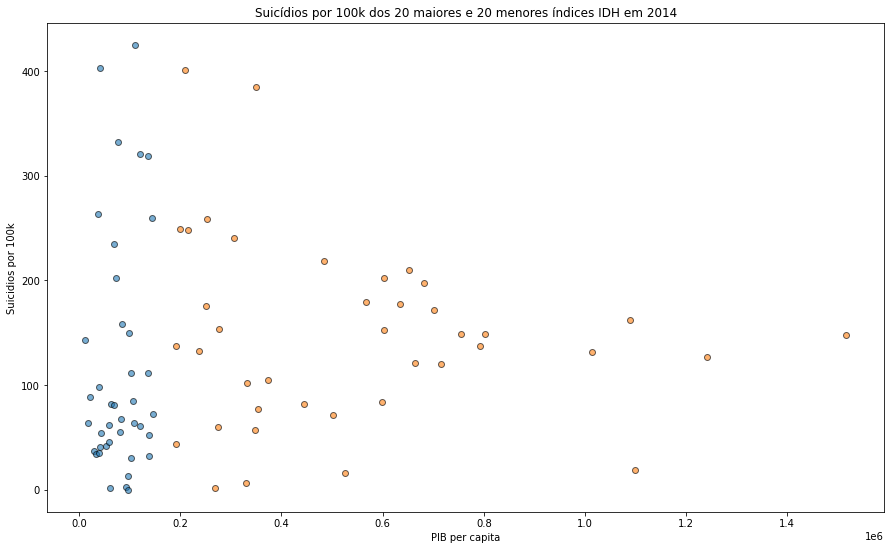

In [ ]:
x8 = mais_pobres2014['gdp_per_capita ($)']
y8 = mais_pobres2014['suicides/100k pop']
x9 = mais_ricos2014['gdp_per_capita ($)']
y9 = mais_ricos2014['suicides/100k pop']
plt.scatter(x8, y8, edgecolor='k', alpha=0.6)
plt.scatter(x9, y9, edgecolor='k', alpha=0.6)
plt.xlabel('PIB per capita')
plt.ylabel('Suicidios por 100k')
plt.title('Suicídios por 100k dos 20 maiores e 20 menores índices IDH em 2014')

Text(0.5, 1.0, 'Suicídios de países com IDH maior do que 8(azul) e menor do que 8(laranja)')

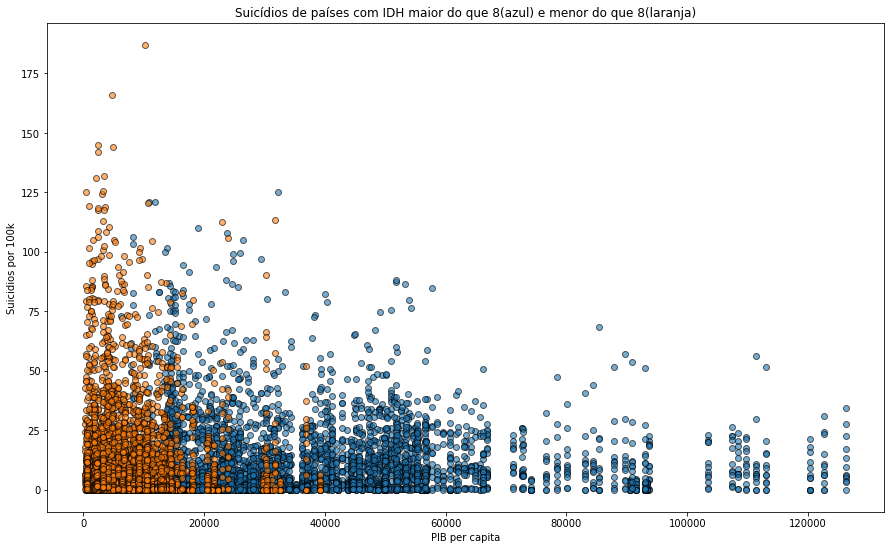

In [ ]:
x = dados_1['gdp_per_capita ($)']
y = dados_1['suicides/100k pop']
x1 = dados_3['gdp_per_capita ($)']
y1 = dados_3['suicides/100k pop']
plt.scatter(x, y, edgecolor='k', alpha=0.6)
plt.scatter(x1, y1, edgecolor='k', alpha=0.6)
plt.xlabel('PIB per capita')
plt.ylabel('Suicidios por 100k')
plt.title('Suicídios de países com IDH maior do que 8(azul) e menor do que 8(laranja)')